In [1]:
import sys
sys.path.append('/root/code/LLM/LSTM_from_wzw')
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import math
from utils import *
import argparse
from matplotlib.legend_handler import HandlerLine2D



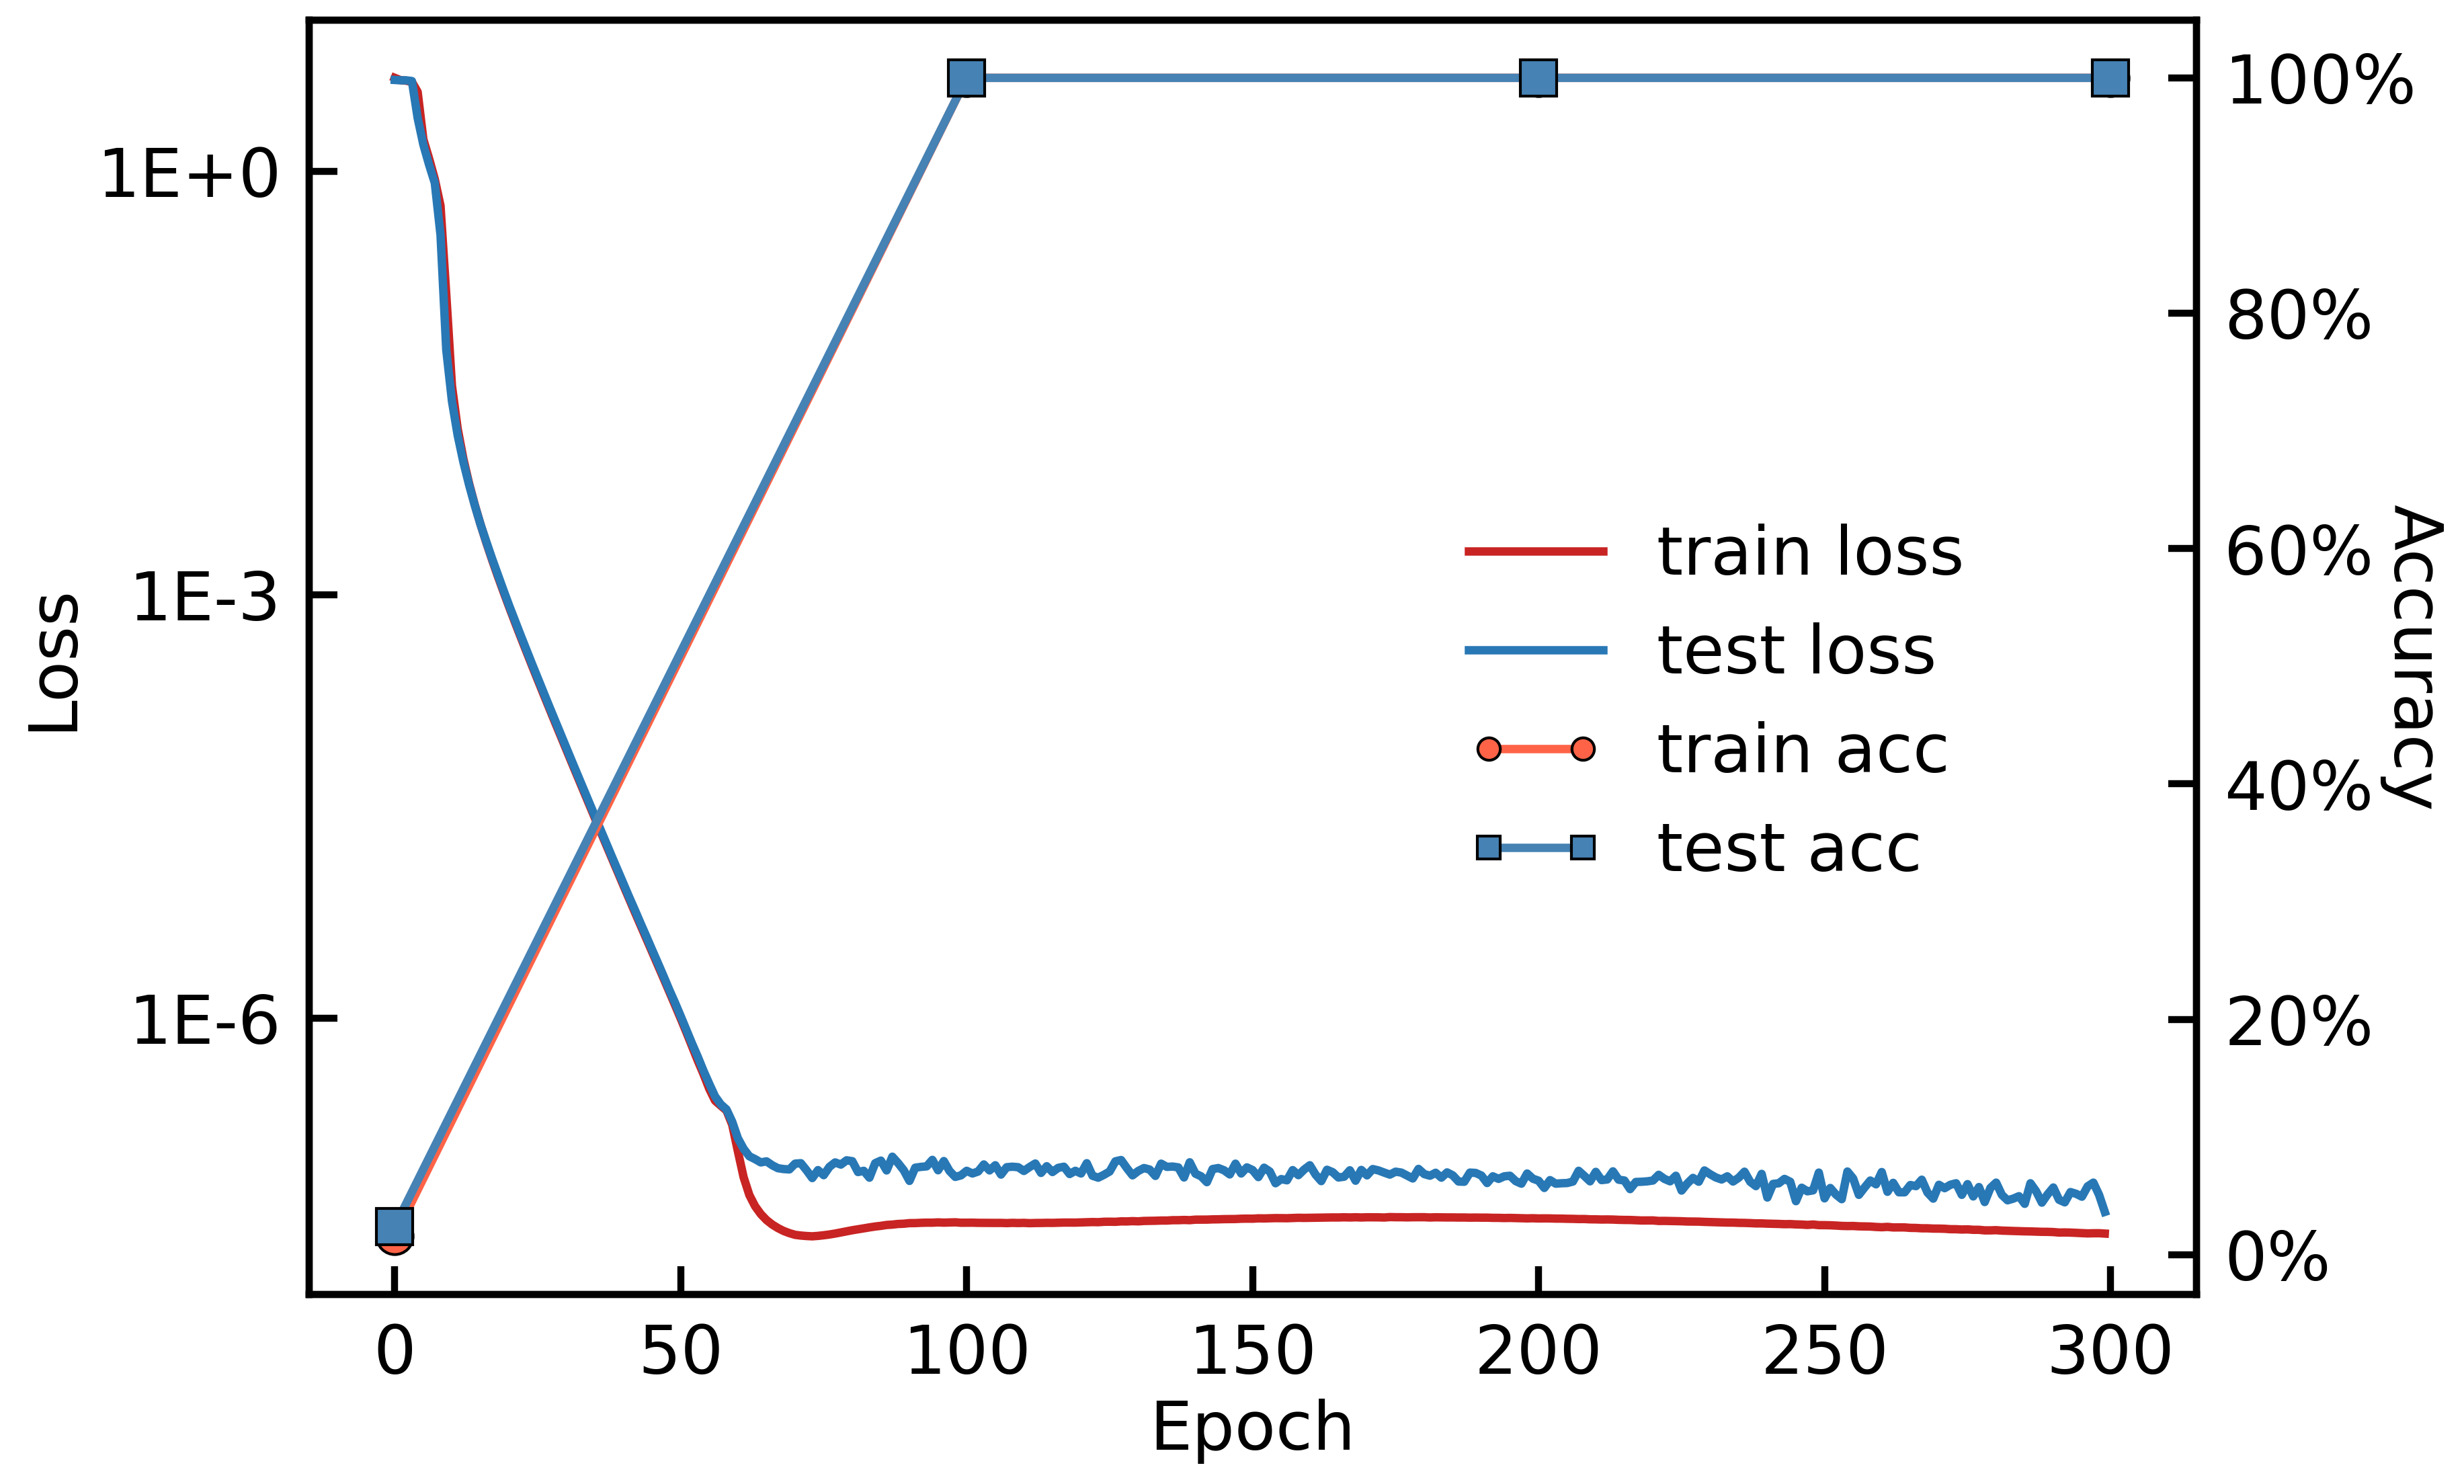

In [11]:
working_dir=r'/root/code/LLM/LSTM_from_wzw/result/GPT_working_memory_inverse_for_paper_test/4head_4layer_new_data_sl_20-working_memory_inverse_two_prompt-seed_1-N_40000'


color_list = ['m', 'teal', 'magenta', 'c']

fig = plt.figure(figsize=(12, 8), dpi=300)
format_settings(wspace=0.4, hspace=0.6, bottom=0.16, fs=24, lw=6, ms=12.5, axlw=2.5, major_tick_len=10)



train_loss_his = np.load(f'{working_dir}/loss/train_loss_his.npy')
test_loss_his = np.load(f'{working_dir}/loss/test_loss_his.npy')

acc_epoch_his = np.load(f'{working_dir}/loss/acc_epoch_his.npy')
test_acc_his = np.load(f'{working_dir}/loss/test_acc_his.npy')
train_acc_his = np.load(f'{working_dir}/loss/train_acc_his.npy')


ax = plt.gca()

l1, = ax.semilogy(train_loss_his[:300], label='train loss', color='#C82423', linestyle='-', lw=3)
l2, = ax.semilogy(test_loss_his[:300], label='test loss', color='#2878B5', linestyle='-', lw=3)

# 新开一个轴画acc
ax2 = ax.twinx()
color_list = ['tomato', 'steelblue', 'lightsalmon', 'skyblue']
l3, = ax2.plot(acc_epoch_his[:4], train_acc_his[:4], label=f'train acc', lw=3, color=color_list[0],
                marker = 'o', markersize=13, markeredgewidth=1, markeredgecolor='black', markerfacecolor=color_list[0], zorder=5)
l4, = ax2.plot(acc_epoch_his[:4], test_acc_his[:4], label=f'test acc', lw=3, color=color_list[1],
                marker = 's', markersize=13, markeredgewidth=1, markeredgecolor='black', markerfacecolor=color_list[1], zorder=5)


# 画legend
l1, = ax.semilogy([], label='train loss', color='#C82423', linestyle='-', lw=3)
l2, = ax.semilogy([], label='test loss', color='#2878B5', linestyle='-', lw=3)
l3, = ax2.plot([], [], label=f'train acc', lw=3, color=color_list[0],
                    marker = 'o', markersize=8, markeredgewidth=1, markeredgecolor='black', markerfacecolor=color_list[0], zorder=5)
l4, = ax2.plot([], [], label=f'test acc', lw=3, color=color_list[1],
                marker = 's', markersize=8, markeredgewidth=1, markeredgecolor='black', markerfacecolor=color_list[1], zorder=5)

# legend
# plt.axvline(x=30, color='black', linestyle='--', lw=2)
handler_map = {}
handler_map[l1] = HandlerLine2D()
handler_map[l3] = HandlerLine2D(numpoints=2)
handler_map[l4] = HandlerLine2D(numpoints=2)
handles = [l1, l2, l3, l4]

ax.legend(loc=(0.6,0.3), handles=handles, frameon=False, handler_map=handler_map)

ax.set_yticks([1e0, 1e-3, 1e-6])
ax.set_yticklabels(['1E+0', '1E-3', '1E-6'])

ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax2.set_ylabel('Accuracy', rotation=270, labelpad=10)

# ax2.set_ylim(-0.05, 0.2)

plt.savefig(f'working_memory.png')

